In [1]:
%run common.ipynb

# Trials

In [2]:
def trial(nn='CNN'):
    print('Processing...')
    print()

    a_N = np.array([])
    a_sqrt_mse = np.array([])

    # 10 random states
    random_states = [0, 3, 5, 8, 11, 16, 17, 20, 21, 24]
    # random_states = [3]
    # random_states = [0, 3, 5]
    # random_states = [3, 5, 8]
    # random_states = [0, 3, 17]

    # hold array of absolute errors
    abs_errors = np.array([], dtype=float)

    # change N [32..2048]
    # for i in range(5, 12):
    # for i in [5]:
    for i in range(5, 13):

        N = 2**i

        a_N = np.append(a_N, N)

        # data generation (fix random state)
        DATA_RANDOM_STATE = 0
        fix_random(seed=DATA_RANDOM_STATE)
        X, y, M = generate_data(N=N, 
                                num_alphas=100, 
                                samples_per_alpha=100, 
                                random_alpha=True, 
                                max_M_only=False, 
                                random_state=DATA_RANDOM_STATE)

        # reshape X for Conv1D
        if 'CNN' == nn:
            X = X.reshape(X.shape[0], X.shape[1], 1)

        # split train/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=DATA_RANDOM_STATE)

        # create model
        if 'CNN' == nn:
            model = create_cnn_model(X.shape[1], filters=32)
        elif 'DNN' == nn:
            model = create_dnn_model(X_train.shape[1], 
                            layers=[256,256], 
                            activation='relu', 
                            init=keras.initializers.HeUniform(seed=DATA_RANDOM_STATE), 
                            batch_normalization=True, 
                            dropout=0.0, 
                            optimizer=Adam(lr=1e-2), 
                            k_reg=True, 
                            k_reg_lr=1e-5, 
                            a_reg=True, 
                            a_reg_lr=1e-5)
        else:
            raise RuntimeError("nn: '{}' not supported".format(nn))

        # average sqrt_mse among different random states (fixed N)
        avg_sqrt_mse = 0

        # change random state
        for rs in random_states:

            # fix random
            fix_random(seed=rs)
        
            # training
            model, history = train(model, X_train, y_train, batch_size=32, random_state=rs)

            # predict
            y_pred = model.predict(X_test).flatten()

            # mse
            mse = mean_squared_error(y_test, y_pred)

            # sqrt_mse
            sqrt_mse = np.sqrt(mse)

            # avg_sqrt_mse (accumulator)
            avg_sqrt_mse += sqrt_mse
            
            print('N = {}, M = {}, random_state = {}    =>    sqrt_mse = {:.6f}'.format(N, M, rs, sqrt_mse))

            # absolute errors
            abs_errors = np.append(abs_errors, np.abs(y_test - y_pred))

        # avg_sqrt_mse
        avg_sqrt_mse = avg_sqrt_mse / len(random_states)
        a_sqrt_mse = np.append(a_sqrt_mse, avg_sqrt_mse)
        print('avg_sqrt_mse = {:.6f}'.format(avg_sqrt_mse))
        print()

    return abs_errors, a_N, a_sqrt_mse

In [3]:
abs_errors_dnn, a_N, a_sqrt_mse_dnn = trial(nn='DNN')


Processing...

N = 32, M = 34, random_state = 0    =>    sqrt_mse = 0.050803
N = 32, M = 34, random_state = 3    =>    sqrt_mse = 0.044461
N = 32, M = 34, random_state = 5    =>    sqrt_mse = 0.041312
N = 32, M = 34, random_state = 8    =>    sqrt_mse = 0.041904
N = 32, M = 34, random_state = 11    =>    sqrt_mse = 0.042260
N = 32, M = 34, random_state = 16    =>    sqrt_mse = 0.042123
N = 32, M = 34, random_state = 17    =>    sqrt_mse = 0.041617
N = 32, M = 34, random_state = 20    =>    sqrt_mse = 0.045574
N = 32, M = 34, random_state = 21    =>    sqrt_mse = 0.041316
N = 32, M = 34, random_state = 24    =>    sqrt_mse = 0.041233
avg_sqrt_mse = 0.043260

N = 64, M = 20, random_state = 0    =>    sqrt_mse = 0.014772
N = 64, M = 20, random_state = 3    =>    sqrt_mse = 0.013197
N = 64, M = 20, random_state = 5    =>    sqrt_mse = 0.014009
N = 64, M = 20, random_state = 8    =>    sqrt_mse = 0.013061
N = 64, M = 20, random_state = 11    =>    sqrt_mse = 0.013323
N = 64, M = 20, random_

In [4]:
abs_errors_cnn, a_N, a_sqrt_mse_cnn = trial(nn='CNN')


Processing...

N = 32, M = 34, random_state = 0    =>    sqrt_mse = 0.040493
N = 32, M = 34, random_state = 3    =>    sqrt_mse = 0.042333
N = 32, M = 34, random_state = 5    =>    sqrt_mse = 0.042639
N = 32, M = 34, random_state = 8    =>    sqrt_mse = 0.040483
N = 32, M = 34, random_state = 11    =>    sqrt_mse = 0.041909
N = 32, M = 34, random_state = 16    =>    sqrt_mse = 0.040486
N = 32, M = 34, random_state = 17    =>    sqrt_mse = 0.040562
N = 32, M = 34, random_state = 20    =>    sqrt_mse = 0.040522
N = 32, M = 34, random_state = 21    =>    sqrt_mse = 0.040482
N = 32, M = 34, random_state = 24    =>    sqrt_mse = 0.040487
avg_sqrt_mse = 0.041040

N = 64, M = 20, random_state = 0    =>    sqrt_mse = 0.011435
N = 64, M = 20, random_state = 3    =>    sqrt_mse = 0.010828
N = 64, M = 20, random_state = 5    =>    sqrt_mse = 0.010944
N = 64, M = 20, random_state = 8    =>    sqrt_mse = 0.010711
N = 64, M = 20, random_state = 11    =>    sqrt_mse = 0.010666
N = 64, M = 20, random_

# plot log(N) vs sqrt_mse

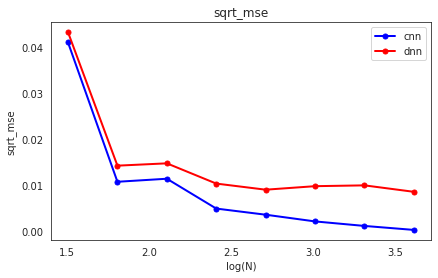

In [9]:
def plot_sqrt_mse():
    
    plt.figure(figsize=(15, 4))
    
    ax1 = plt.subplot(1, 2, 1)
    ax1.set(title='sqrt_mse', xlabel='log(N)', ylabel='sqrt_mse')
    ax1.plot(np.log10(a_N), a_sqrt_mse_cnn, '.b-', linewidth=2, markersize=10, label='cnn')
    ax1.plot(np.log10(a_N), a_sqrt_mse_dnn, '.r-', linewidth=2, markersize=10, label='dnn')
    plt.legend(loc='upper right')

plot_sqrt_mse()

# plot abs(error) distributions

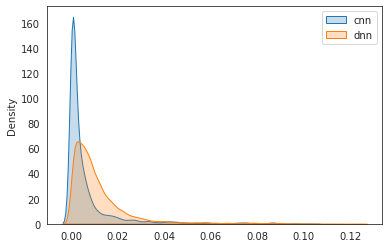

In [12]:
def plot_error_dist():
    _ = sns.distplot(abs_errors_cnn, hist=False, kde=True, kde_kws={"shade": True}, label='cnn')
    _ = sns.distplot(abs_errors_dnn, hist=False, kde=True, kde_kws={"shade": True}, label='dnn')
    plt.legend(loc='upper right')
    
plot_error_dist()


# avg & std of errors

In [14]:
print()
print('avg(abs_errors_dnn):\t{:.6f}'.format(np.average(abs_errors_dnn)))
print('std(abs_errors_dnn):\t{:.6f}'.format(np.std(abs_errors_dnn)))

print()
print('avg(abs_errors_cnn):\t{:.6f}'.format(np.average(abs_errors_cnn)))
print('std(abs_errors_cnn):\t{:.6f}'.format(np.std(abs_errors_cnn)))


avg(abs_errors_dnn):	0.012108
std(abs_errors_dnn):	0.014478

avg(abs_errors_cnn):	0.007027
std(abs_errors_cnn):	0.014072
